In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('/content/project15.csv')
df

state  account length  ...  customer service calls  churn
0       KS             128  ...                       1  False
1       OH             107  ...                       1  False
2       NJ             137  ...                       0  False
3       OH              84  ...                       2  False
4       OK              75  ...                       3  False
...    ...             ...  ...                     ...    ...
3328    AZ             192  ...                       2  False
3329    WV              68  ...                       3  False
3330    RI              28  ...                       2  False
3331    CT             184  ...                       2  False
3332    TN              74  ...                       0  False

[3333 rows x 21 columns]

In [3]:
df.shape

(3333, 21)

In [4]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [5]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
df.describe()

account length    area code  ...  total intl charge  customer service calls
count     3333.000000  3333.000000  ...        3333.000000             3333.000000
mean       101.064806   437.182418  ...           2.764581                1.562856
std         39.822106    42.371290  ...           0.753773                1.315491
min          1.000000   408.000000  ...           0.000000                0.000000
25%         74.000000   408.000000  ...           2.300000                1.000000
50%        101.000000   415.000000  ...           2.780000                1.000000
75%        127.000000   510.000000  ...           3.270000                2.000000
max        243.000000   510.000000  ...           5.400000                9.000000

[8 rows x 16 columns]

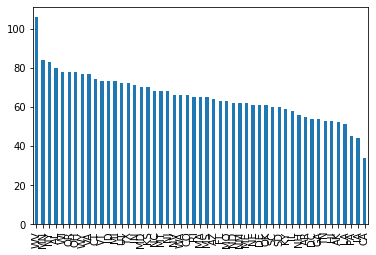

In [8]:
# state wise value counts 
df['state'].value_counts().plot(kind='bar')

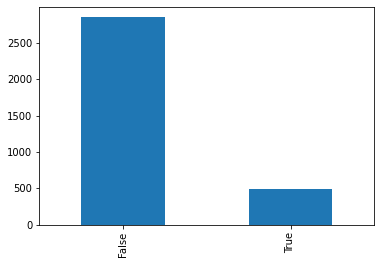

In [9]:
# churn value counts
df['churn'].value_counts().plot(kind='bar')

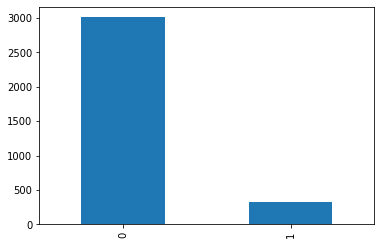

In [24]:
# Internatinal plan counts 
df['international plan'].value_counts().plot(kind='bar')

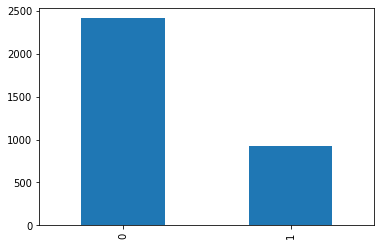

In [26]:
# voice mail plan value counts 
df['voice mail plan'].value_counts().plot(kind='bar')

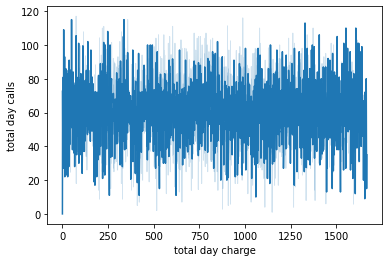

In [27]:
sns.lineplot( x=df["total day charge"], y=df["total day calls"])

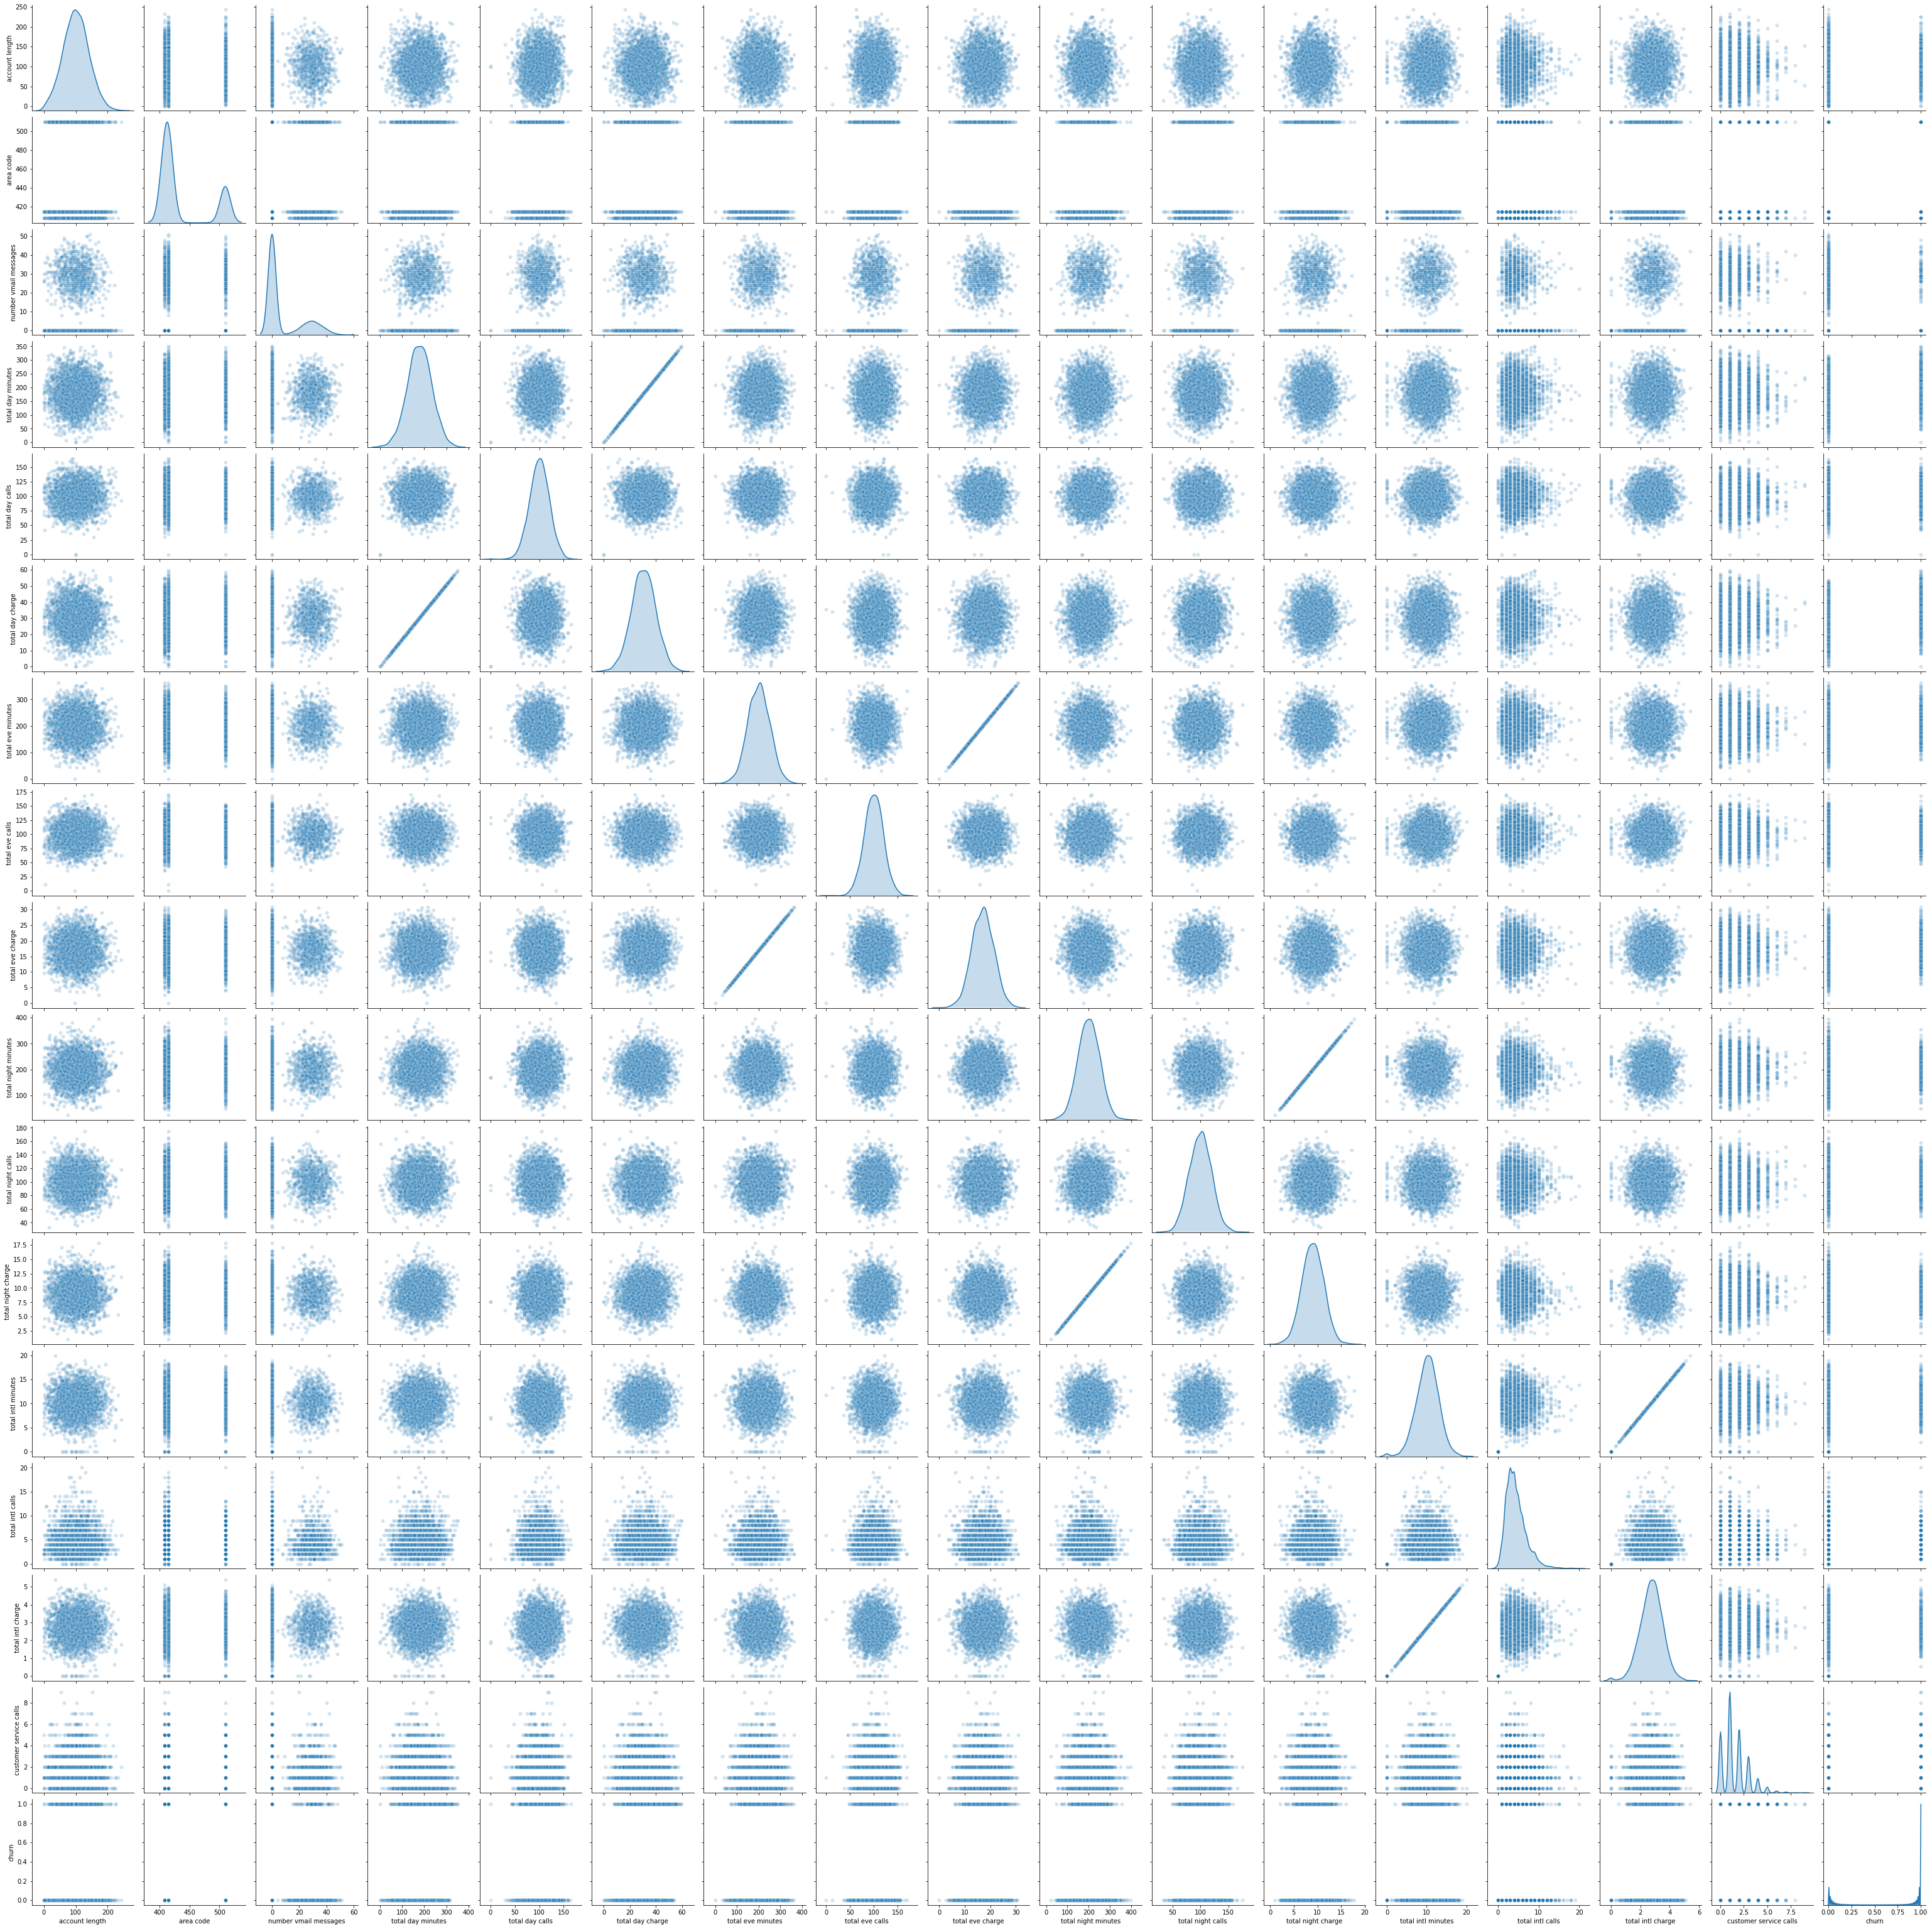

In [10]:
 sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.2})

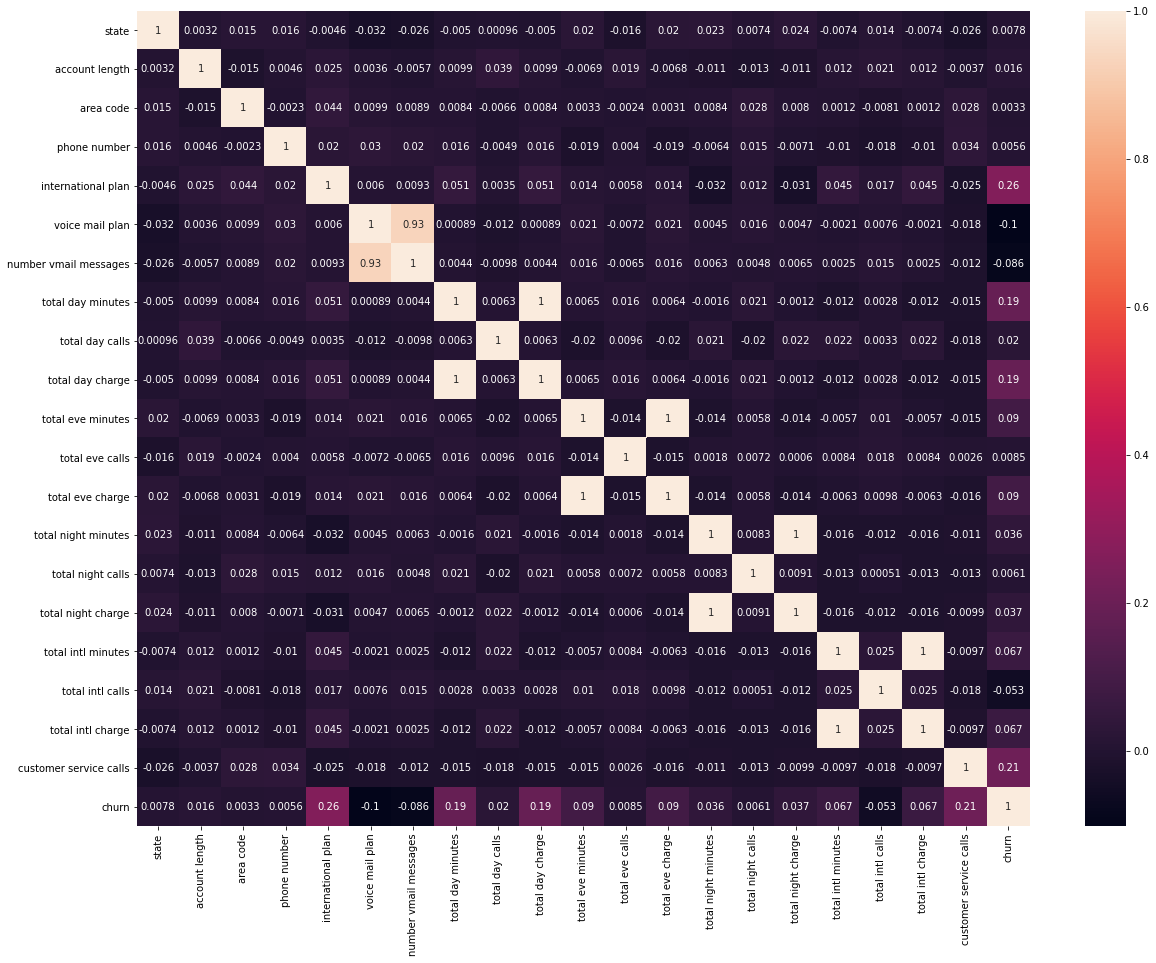

In [28]:
# Checking correlation of datasets 
corr_hmap=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [12]:
df

state  account length  ...  customer service calls  churn
0        16             126  ...                       1      0
1        35             105  ...                       1      0
2        31             135  ...                       0      0
3        35              82  ...                       2      0
4        36              73  ...                       3      0
...     ...             ...  ...                     ...    ...
3328      3             189  ...                       2      0
3329     49              66  ...                       3      0
3330     39              26  ...                       2      0
3331      6             182  ...                       2      0
3332     42              72  ...                       0      0

[3333 rows x 21 columns]

In [13]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df1=df.loc[(z_score<3).all(axis=1)]
print(df1.shape)

(3333, 21)
(2910, 21)


In [14]:
x=df1.iloc[:,1:]
y=df1.iloc[:,-1]
x,y

(      account length  area code  ...  customer service calls  churn
 0                126          1  ...                       1      0
 1                105          1  ...                       1      0
 2                135          1  ...                       0      0
 6                119          2  ...                       3      0
 8                115          0  ...                       1      0
 ...              ...        ...  ...                     ...    ...
 3327              77          1  ...                       2      0
 3328             189          1  ...                       2      0
 3329              66          1  ...                       3      0
 3330              26          2  ...                       2      0
 3332              72          1  ...                       0      0
 
 [2910 rows x 20 columns], 0       0
 1       0
 2       0
 6       0
 8       0
        ..
 3327    0
 3328    0
 3329    0
 3330    0
 3332    0
 Name: churn, Length: 2

In [15]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20,stratify=y)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(2037, 20) (873, 20)
(2037,) (873,)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [17]:
KNN=KNeighborsClassifier(n_neighbors=6)
sv=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [18]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',sv))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

****************************** KNeighborsClassifier ********************************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_score= 0.8991981672394044


cross_val_score= 0.906875321648049


roc_auc_score= 0.5691854958733595


classification_report
               precision    recall  f1-score   support

           0       0.90      0.99      0.95       778
           1       0.67      0.15      0.24        95

    accuracy                           0.90       873
   macro avg       0.79      0.57      0.59       873
weighted avg       0.88      0.90      0.87       873



[[771   7]
 [ 81  14]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************** SVC ********************************************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIO

cross_val_score= 0.8914097266369994


roc_auc_score= 0.504620484372886


classification_report
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       778
           1       0.50      0.01      0.02        95

    accuracy                           0.89       873
   macro avg       0.70      0.50      0.48       873
weighted avg       0.85      0.89      0.84       873



[[777   1]
 [ 94   1]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************** DecisionTreeClassifier ********************************************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state

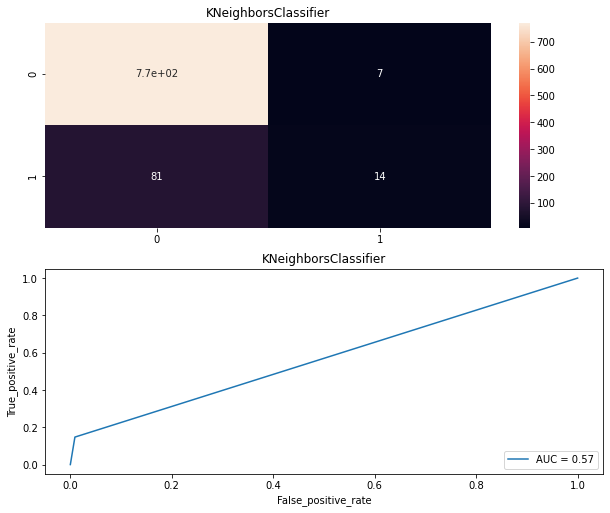

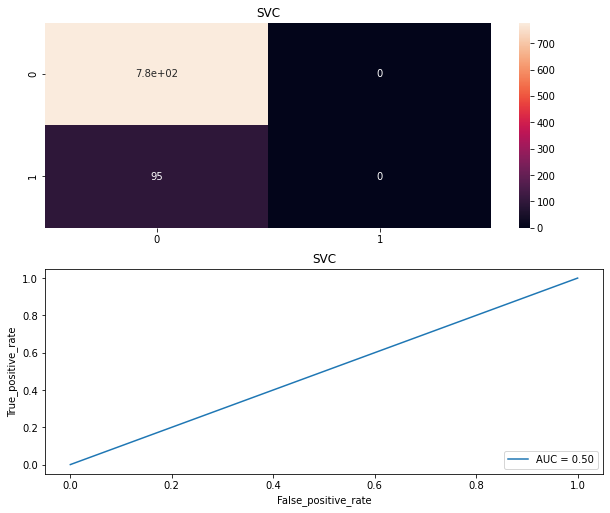

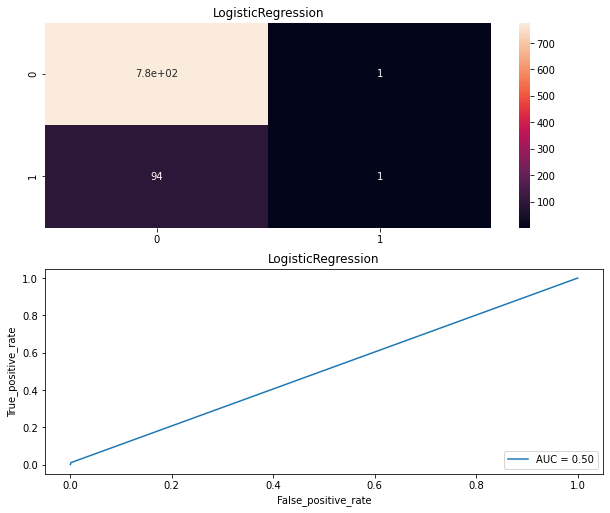

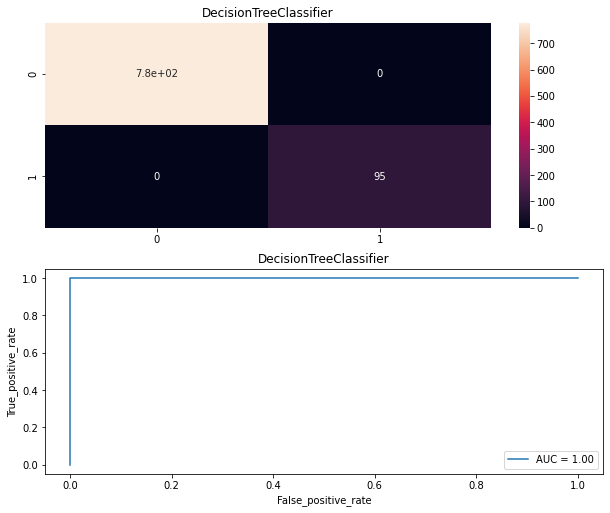

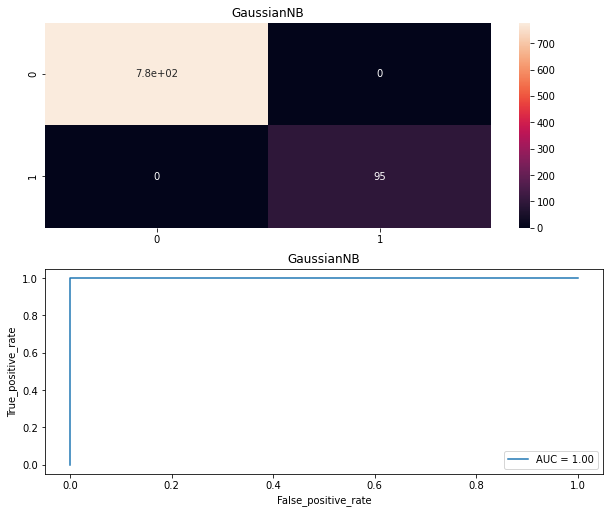

In [20]:
Model = []
score = []
cvs = []
rocscore=[]
for name,model in models:
    print('******************************',name,'********************************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=8,scoring='accuracy').mean()
    print("cross_val_score=",sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [21]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cvs,'ROC_AUC_curve':rocscore})

In [22]:
result

Model  Accuracy_score  Cross_val_score  ROC_AUC_curve
0    KNeighborsClassifier       89.919817        90.687532      56.918550
1                     SVC       89.117984        89.106632      50.000000
2      LogisticRegression       89.117984        89.140973      50.462048
3  DecisionTreeClassifier      100.000000       100.000000     100.000000
4              GaussianNB      100.000000       100.000000     100.000000

In [31]:
# Saving DecisionTreeClassifier	model because Accuracy,Cross_val and Roc curve reach 100.
from sklearn.externals import joblib
joblib.dump(DT,'PROJECT15_MODEL1.pkl')
model=joblib.load('PROJECT15_MODEL1.pkl')
model.predict(x_test)

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,